#Final Project Data Business Analysis
Kelompok 4 - DBA - A9


1. DBA2049286	MOKHAMMAD RIZKI ALVIN AMRULLOH
2. DBA1998932	CHRISTA THRESIA ZEFANYA RUT VAALOVA
3. DBA2220233	FEMILIA SINAGA



# 0. Libraries

In [ ]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Data Loading & Exploration
Data set yang digunakan dalam projek ini merupakan data terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengetahui apakah produk perbankan digunakan oleh pelanggan atau tidak. Folder data berisi dua kumpulan data: -n data kampanye pemasaran yang dilakukan oleh perbankan di Portugis. 
1. train.csv: 45.211 baris dan 18 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
2. test.csv: 4521 baris dan 18 kolom dengan 10% contoh (4521), dipilih secara acak dari train.csv

Data set ini diambil dari [Kaggle](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)

**Data Dictionary**:

| No | column | description |
| ------ | ------ | ----------- |
| 1 | age | Numeric |
| 2 | job | type of job |
| 3 | marital | marital status |
| 4 | education | last eduction responden |
| 5 | default | has credit in default? |
| 6 | balance | average yearly balance, in euros |
| 7 | housing | has housing loan? |
| 8 | loan | has personal loan?|
| 9 | contact | contact communication type |
| 10 | day | last contact day of the month |
| 11 | month | last contact month of year |
| 12 | duration | last contact duration, in seconds |
| 13 | campaign | number of contacts performed during this campaign and for this client |
| 14 | pdays | number of days that passed by after the client was last contacted from a previous campaign |
| 15 | previous | number of contacts performed before this campaign and for this client |
| 16 | poutcome | outcome of the previous marketing campaign |
| 17 | Y |  has the client subscribed a term deposit |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv',sep=';')
b = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',sep=';')

In [ ]:
a.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.merge(a,b)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# 2. Explotatory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [ ]:
numerical_features= df.select_dtypes("int64").columns.tolist()
categorical_features= df.select_dtypes("object").columns.tolist()
print("Numerical features:",numerical_features)
print("Categorical features:",categorical_features)

Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


## 2.1 EDA on Categorical Features

In [ ]:
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


## 2.2 Number of Unique Values

In [ ]:
df[categorical_features].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

## 2.3 Count of Unique Values

In [ ]:
for feature in categorical_features:
  print(df[feature].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64
no     4000
yes     521
Name: y, dtype: int64

Nilai *unknown* akan dianggap sebagai NaN dan akan di-*drop*.

In [ ]:
for column in df.columns:
  df=df[(df[column]!="unknown")]
df.info()
df["y"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 1 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        764 non-null    int64 
 1   job        764 non-null    object
 2   marital    764 non-null    object
 3   education  764 non-null    object
 4   default    764 non-null    object
 5   balance    764 non-null    int64 
 6   housing    764 non-null    object
 7   loan       764 non-null    object
 8   contact    764 non-null    object
 9   day        764 non-null    int64 
 10  month      764 non-null    object
 11  duration   764 non-null    int64 
 12  campaign   764 non-null    int64 
 13  pdays      764 non-null    int64 
 14  previous   764 non-null    int64 
 15  poutcome   764 non-null    object
 16  y          764 non-null    object
dtypes: int64(7), object(10)
memory usage: 107.4+ KB


no     593
yes    171
Name: y, dtype: int64

In [ ]:
for feature in categorical_features:
  print(df[feature].value_counts())

management       177
blue-collar      143
technician       137
admin.           102
services          58
retired           44
self-employed     26
entrepreneur      21
unemployed        20
student           19
housemaid         17
Name: job, dtype: int64
married     456
single      228
divorced     80
Name: marital, dtype: int64
secondary    407
tertiary     260
primary       97
Name: education, dtype: int64
no     759
yes      5
Name: default, dtype: int64
yes    489
no     275
Name: housing, dtype: int64
no     672
yes     92
Name: loan, dtype: int64
cellular     697
telephone     67
Name: contact, dtype: int64
may    253
apr    111
nov    102
feb     73
jan     55
aug     46
oct     29
jun     25
jul     23
sep     21
mar     14
dec     12
Name: month, dtype: int64
failure    466
other      183
success    115
Name: poutcome, dtype: int64
no     593
yes    171
Name: y, dtype: int64


## 2.4 Summary Statistic

In [ ]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,764.0,41.277487,11.331024,20.0,33.00,38.0,48.00,86.0
balance,764.0,1600.434555,2980.860786,-1400.0,141.25,624.5,1648.75,26306.0
day,764.0,14.585079,7.814483,1.0,7.75,14.0,19.25,31.0
duration,764.0,273.887435,246.587595,5.0,119.75,203.0,332.00,1579.0
campaign,764.0,2.037958,1.590395,1.0,1.00,1.0,2.00,11.0
pdays,764.0,224.634817,113.201111,1.0,140.00,190.0,329.25,871.0
previous,764.0,3.019634,2.939919,1.0,1.00,2.0,4.00,25.0


Dari summary di atas:


*   Nilai median dari **Age, Day dan Duration** memiliki nilai yang lebih besar dibandingkan dengan nilai standard deviasinya. Terjadi distribusi tidak merata, karena perbedaan data satu dengan yang lainnya lebih besar dari nilai rata-rata.
*   Nilai median dari **Campaign, Pdays dan Previous** memiliki nilai yang lebih kecil dibandingkan dengan nilai standard deviasinya. Hal ini menunjukkan data pada variabel bersifat Homogen


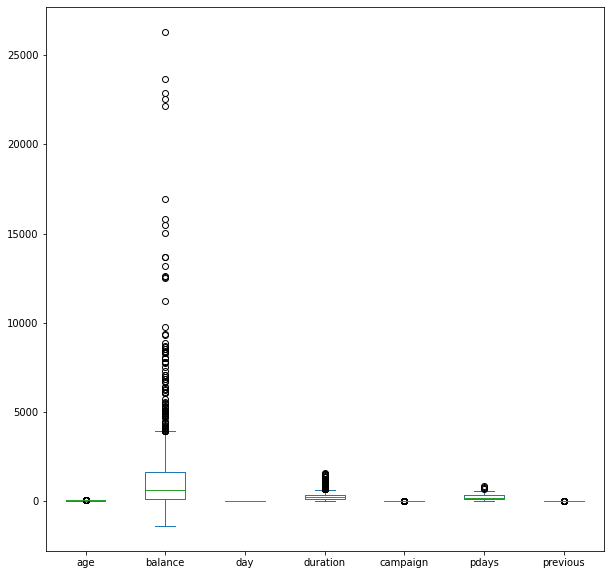

In [ ]:
df[numerical_features].plot(kind="box", figsize=(10,10))
plt.grid(False)
plt.show()

Melihat visualisasi box plot menunjukkan bahwa variabel **Balance, Pday dan Duration** cenderung bersifat Heterogen sedangkan variabel lainnya yaitu **Age, Day, Campaign dan Previus** cenderung bersifat homogen


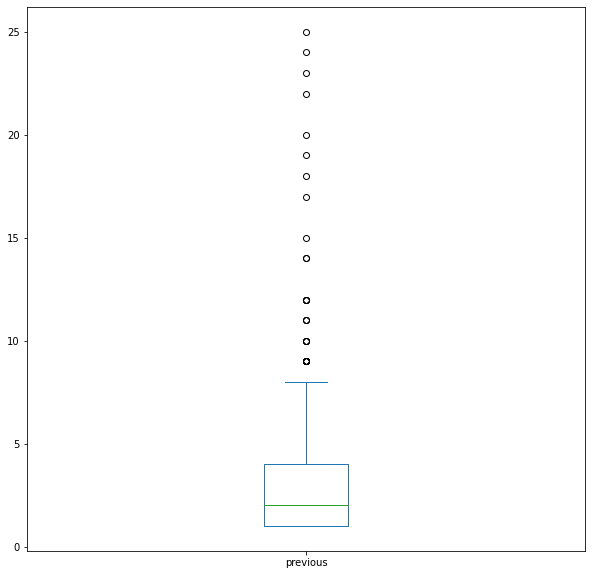

In [ ]:
df["previous"].plot(kind="box", figsize=(10,10))
plt.grid(False)
plt.show()

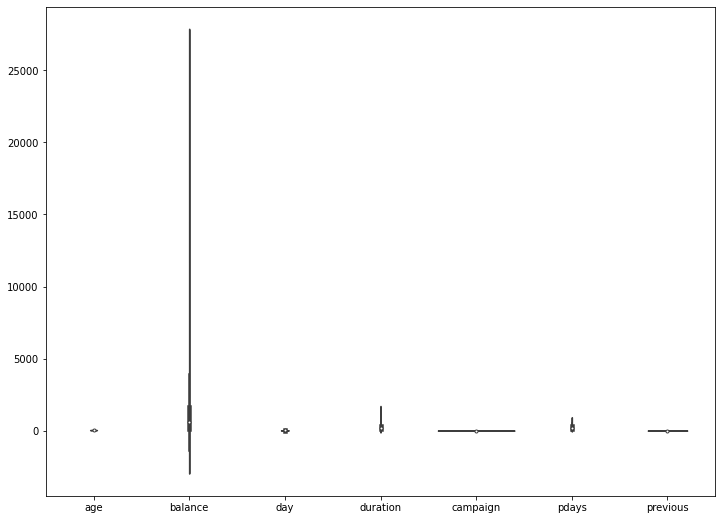

In [ ]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=df[numerical_features])
plt.grid(False)
plt.show()

Pada visualisasi violin ploat juga menunjukkan hal demikian yaitu  Balance, Pday dan Duration cenderung bersifat Heterogen sedangkan variabel lainnya yaitu Age, Day, Campaign dan Previus cenderung bersifat homogen. Hal ini tidak berbeda jauh dengan hasil visualisasi menggunakan box plot.

In [ ]:
df[categorical_features].describe().T

,count,unique,top,freq
job,764,11,management,177
marital,764,3,married,456
education,764,3,secondary,407
default,764,2,no,759
housing,764,2,yes,489
loan,764,2,no,672
contact,764,2,cellular,697
month,764,12,may,253
poutcome,764,3,failure,466
y,764,2,no,593


## 2.5 Correlation

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.028072,0.035271,0.088018,-0.047858,-0.109266,-0.028334
balance,0.028072,1.000000,-0.019841,-0.012971,0.035704,-0.085229,0.003539
day,0.035271,-0.019841,1.000000,0.008886,-0.012651,-0.118415,-0.019441
duration,0.088018,-0.012971,0.008886,1.000000,-0.117495,-0.016472,0.033505
campaign,-0.047858,0.035704,-0.012651,-0.117495,1.000000,0.085782,0.082531
pdays,-0.109266,-0.085229,-0.118415,-0.016472,0.085782,1.000000,-0.069782
previous,-0.028334,0.003539,-0.019441,0.033505,0.082531,-0.069782,1.000000


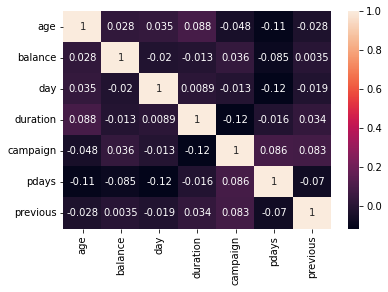

In [ ]:
plt.plot(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
Y=df["y"]
X=df.drop(columns=["y"])
print(Y)

1        no
2        no
5        no
6        no
9        no
       ... 
4492     no
4504    yes
4514     no
4519     no
4520     no
Name: y, Length: 764, dtype: object


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [ ]:
df.groupby('age').sum()

,balance,day,duration,campaign,pdays,previous
age,,,,,,
20,291,11,172,5,371,5
21,9693,49,713,10,391,11
22,5960,28,781,3,221,13
23,8627,15,169,1,346,1
24,1629,51,405,5,786,4
25,3669,97,1427,14,1336,12
26,11555,243,3478,25,2368,37
27,30191,230,4032,25,4004,35
28,12810,313,4401,46,4366,69


## 2.6 Visualization

2.6.1 Age Category

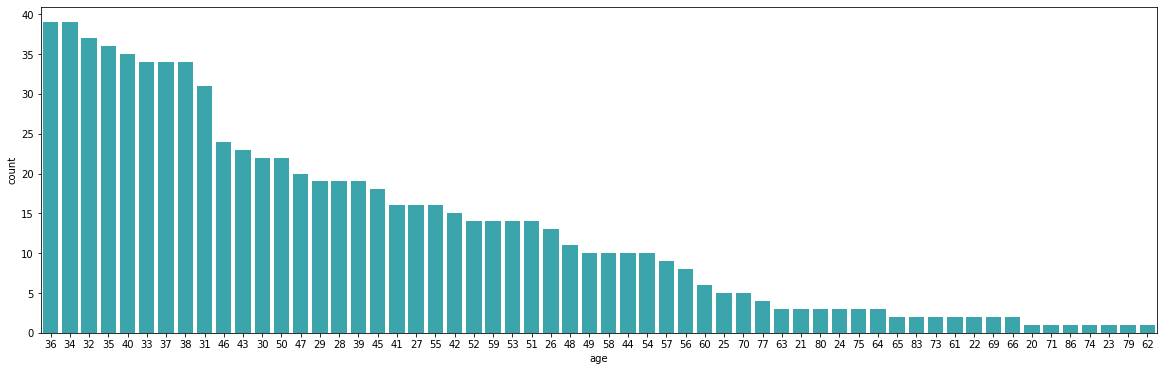

In [ ]:
age_category_order = df.age.value_counts().index

plt.figure(figsize=(20, 6))
sns.countplot(
    x="age",
    data=df,
    order=age_category_order,
    palette=["#29B5BF"]
)
plt.grid(False)
plt.show()

2.6.2 Campaign Category

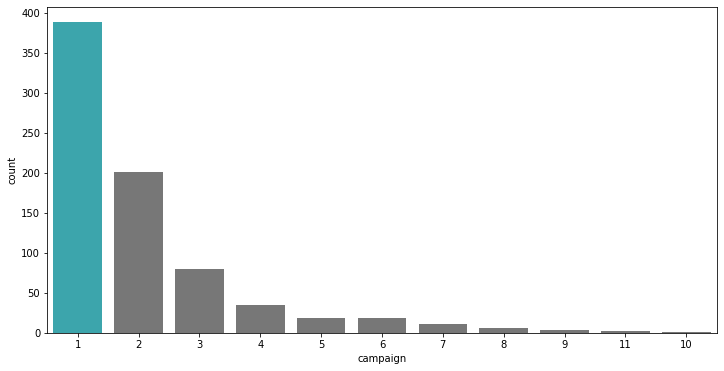

In [ ]:
campaign_category_order = df.campaign.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="campaign",
    data=df,
    order=campaign_category_order,
    palette=["#29B5BF"] + (len(campaign_category_order)-1)*["#777777"]
)
plt.grid(False)
plt.show()

2.6.3 Day Catergory

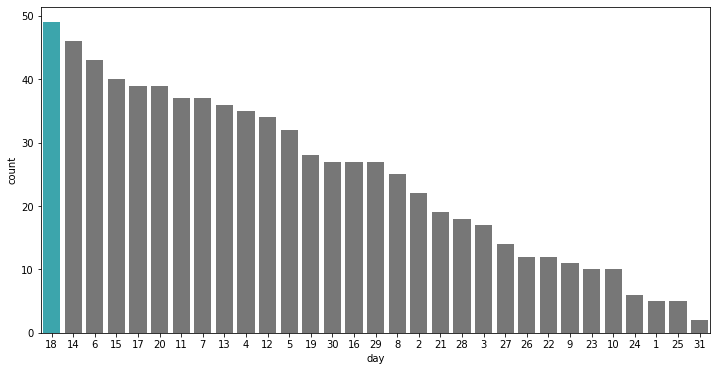

In [ ]:
day_category_order = df.day.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="day",
    data=df,
    order=day_category_order,
    palette=["#29B5BF"] + (len(day_category_order)-1)*["#777777"]
)
plt.grid(False)
plt.show()

2.6.4 Housing

In [ ]:
def plot_count(x, data=df, palette=None, figsize=(12, 6)):
    column_order = data[x].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, data=data, order=column_order,
        palette=palette
    )
    plt.grid(False)
    plt.show()

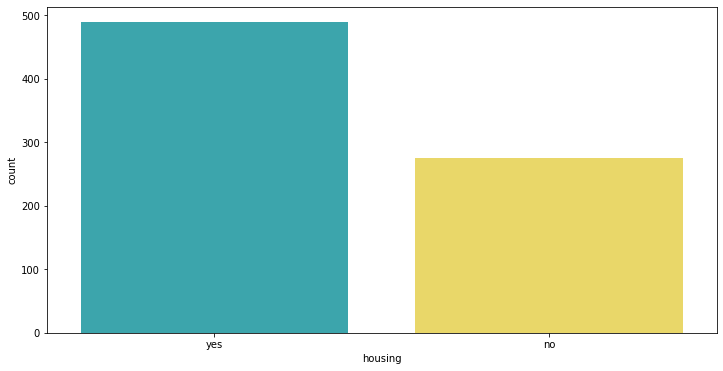

In [ ]:
house_order = df["housing"].value_counts().index
plot_count(
    "housing",
    palette=["#29B5BF", "#FFE653"]
    )

2.6.5 Loan

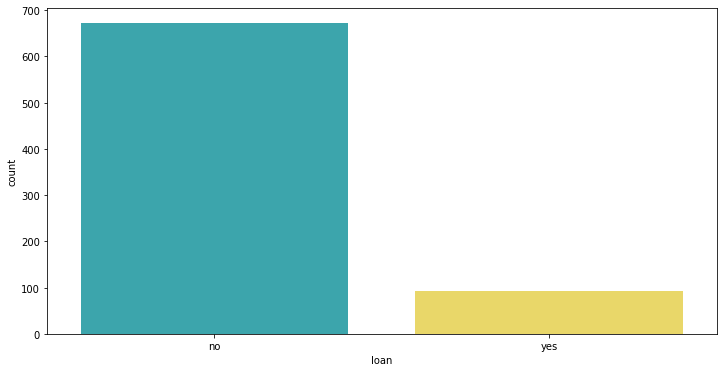

In [ ]:
loan_order = df["loan"].value_counts().index
plot_count(
    "loan",
    palette=["#29B5BF", "#FFE653"])

2.6.6 Education

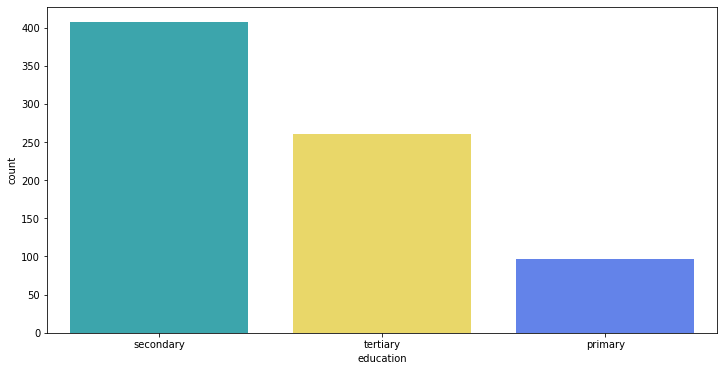

In [ ]:
education_order = df["education"].value_counts().index
plot_count(
    "education",
    palette=["#29B5BF", "#FFE653", "#4D77FF", "#630606"])

2.6.7 Marital

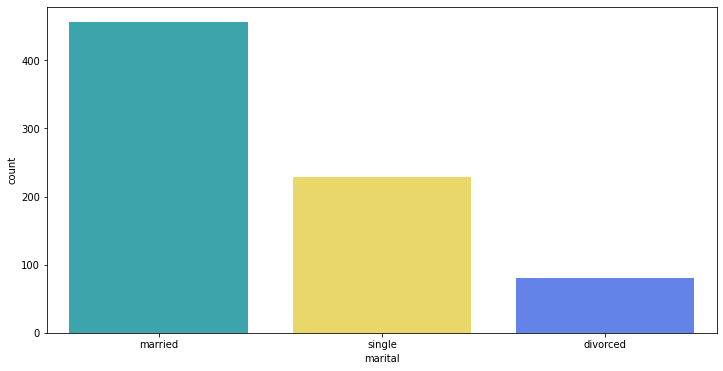

In [ ]:
marital_order = df["marital"].value_counts().index
plot_count(
    "marital",
    palette=["#29B5BF", "#FFE653", "#4D77FF"])

# 3. Modeling Development

## 3.1 Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=11)

print("training size:", X_train.shape[0])
#print("dev size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

training size: 534
test size: 230


Diperoleh:
* data training sebanyak **534** baris
* data development sebanyak **207** baris
* data test sebanyak **23** baris

In [ ]:
#X_train, X_rest, y_train, y_rest = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=11)
#X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.1, stratify=y_rest, random_state=11)


nominal_features = ["job","marital","contact","month","poutcome"]
#month dan poutcome juga termasuk ke nominal(?)
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['job', 'marital', 'contact', 'month', 'poutcome']
ordinal features:
['education', 'default', 'housing', 'loan']


In [ ]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
#X_dev_onehot = pd.DataFrame(
#    onehot.transform(X_dev[nominal_features]).toarray(),
#    columns=onehot.get_feature_names_out()
#)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
#X_dev_ordinal = pd.DataFrame(
#    ordinal.transform(X_dev[ordinal_features]),
#    columns=ordinal.feature_names_in_
#)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


ordinal matrix:


,education,default,housing,loan
0,2.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0
...,...,...,...,...
529,1.0,0.0,1.0,0.0
530,2.0,0.0,0.0,0.0
531,1.0,0.0,1.0,1.0
532,1.0,0.0,1.0,0.0


## 3.2 Data Rescalling

In [ ]:
X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1
)
#X_dev_combined = pd.concat(
#    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
#    axis=1
#)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,education,default,housing,loan
0,45,6945,5,131,5,356,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,36,649,16,237,2,91,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2,29,21,14,107,4,371,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
3,26,203,16,104,1,196,1,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,6,101,5,3,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
#X_dev_scaled = pd.DataFrame(
#    scaler.transform(X_dev_combined),
#    columns=X_dev_combined.columns
#)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,education,default,housing,loan
0,0.301950,1.794352,-1.234982,-0.578515,1.834509,1.196941,-0.011899,-0.378773,-0.480015,-0.192076,-0.138145,1.771873,-0.256648,-0.197257,-0.27679,-0.151620,-0.462208,-0.15162,-0.372280,0.817771,-0.622104,0.321412,-0.321412,-0.391596,3.960745,-0.138145,-0.321412,-0.27679,-0.186772,-0.186772,-0.15162,-0.692260,-0.413585,-0.192076,-0.170005,0.824163,-0.575909,-0.428994,1.172798,-0.075165,-1.307922,-0.375534
1,-0.484167,-0.314795,0.180212,-0.154423,-0.029082,-1.220481,-0.680774,-0.378773,-0.480015,-0.192076,-0.138145,1.771873,-0.256648,-0.197257,-0.27679,-0.151620,-0.462208,-0.15162,2.686147,-1.222836,-0.622104,0.321412,-0.321412,-0.391596,-0.252478,-0.138145,-0.321412,-0.27679,5.354126,-0.186772,-0.15162,-0.692260,-0.413585,-0.192076,-0.170005,0.824163,-0.575909,-0.428994,1.172798,-0.075165,-1.307922,-0.375534
2,-1.095592,-0.525173,-0.077096,-0.674536,1.213312,1.333776,-0.011899,-0.378773,-0.480015,-0.192076,-0.138145,1.771873,-0.256648,-0.197257,-0.27679,-0.151620,-0.462208,-0.15162,-0.372280,-1.222836,1.607449,0.321412,-0.321412,-0.391596,-0.252478,-0.138145,-0.321412,-0.27679,-0.186772,-0.186772,-0.15162,1.444543,-0.413585,-0.192076,-0.170005,0.824163,-0.575909,-0.428994,1.172798,-0.075165,0.764572,-0.375534
3,-1.357631,-0.464204,0.180212,-0.686539,-0.650279,-0.262635,-0.680774,-0.378773,-0.480015,-0.192076,-0.138145,-0.564374,-0.256648,-0.197257,-0.27679,6.595453,-0.462208,-0.15162,-0.372280,-1.222836,1.607449,0.321412,-0.321412,-0.391596,-0.252478,-0.138145,-0.321412,-0.27679,-0.186772,-0.186772,-0.15162,-0.692260,2.417882,-0.192076,-0.170005,0.824163,-0.575909,-0.428994,-0.336296,-0.075165,-1.307922,-0.375534
4,-0.833553,-0.532208,-1.106328,-0.698541,1.834509,-2.023248,0.991412,-0.378773,-0.480015,-0.192076,-0.138145,-0.564374,-0.256648,-0.197257,-0.27679,6.595453,-0.462208,-0.15162,-0.372280,-1.222836,1.607449,0.321412,-0.321412,-0.391596,3.960745,-0.138145,-0.321412,-0.27679,-0.186772,-0.186772,-0.15162,-0.692260,-0.413585,-0.192076,-0.170005,-1.213352,1.736386,-0.428994,1.172798,-0.075165,-1.307922,-0.375534


## 3.3 Modeling

In [ ]:
model_default = DecisionTreeClassifier(random_state=11)
model_default.fit(X_train_scaled, y_train)

preds_train = model_default.predict(X_train_scaled)
#preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [ ]:
print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())

train prediction samples:
 ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
train target samples:
 ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
#print("dev prediction samples:\n", preds_dev[:10])
#print("dev target samples:\n", y_dev[:10].tolist())

In [ ]:
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

test prediction samples:
 ['no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no']
test target samples:
 ['no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no']


In [ ]:
# long running code with full depth
# plot_tree(model_default)
# plt.show()

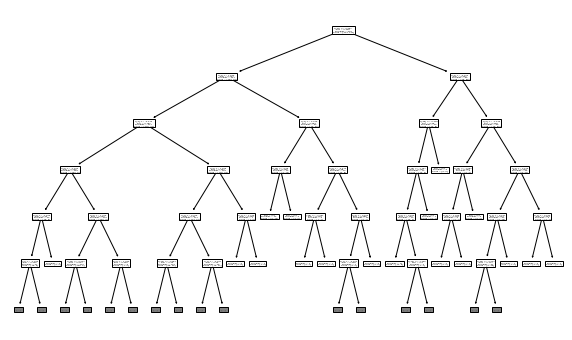

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(model_default, max_depth=5)
plt.show()

## 3.4 Model Evaluation

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       414
         yes       1.00      1.00      1.00       120

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



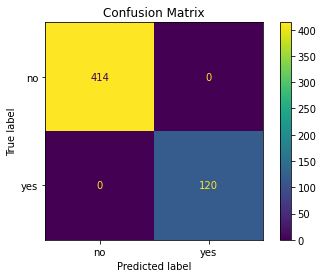

In [ ]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
414 / (414+120)

0.7752808988764045

Insight yang diperoleh melalui evaluasi model pada data training yaitu:


*   Semua **evaluasi metrics dapat dikatakan sangat bagus** mulai dari accuracy, precision, recall, dan f1-score
*   Dari 120 data yang belabel **yes**, model gagal yang diperdiksi berjumlah 0 data dengan benar (False Negative)



In [ ]:
#print(classification_report(y_dev, preds_dev))

#ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
#plt.title("Confusion Matrix")
#plt.grid(False)
#plt.show()

              precision    recall  f1-score   support

          no       0.89      0.86      0.88       179
         yes       0.56      0.63      0.59        51

    accuracy                           0.81       230
   macro avg       0.73      0.74      0.73       230
weighted avg       0.82      0.81      0.81       230



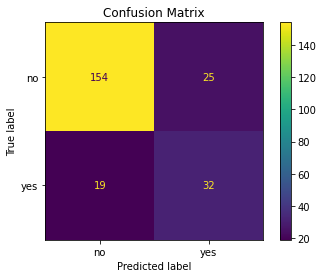

In [ ]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [ ]:
ordinal.feature_names_in_.tolist()

['education', 'default', 'housing', 'loan']

In [ ]:
numerical_features + onehot.get_feature_names_out().tolist() + ordinal.feature_names_in_.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'education',
 'default',
 'housing',
 'loan']

In [ ]:
column_names = (
    numerical_features
    + onehot.get_feature_names_out().tolist()
    + ordinal.feature_names_in_.tolist()
)
X_processed = pd.concat(
    [
     # numerical features
     X[numerical_features].reset_index(drop=True),
     # one-hot encoded features
     pd.DataFrame(
         onehot.transform(X[nominal_features]).toarray(),
         columns=onehot.get_feature_names_out().tolist()
     ),
     # ordinal encoded features
     pd.DataFrame(
         ordinal.transform(X[ordinal_features]),
         columns=ordinal.feature_names_in_.tolist()
     ),
    ],
    axis=1
)
X_processed_scaled = pd.DataFrame(
    scaler.transform(X_processed),
    columns=X_processed.columns
)

print("Predicting all {} data..".format(X_processed_scaled.shape[0]))
preds_full = model_default.predict(X_processed_scaled)

print("Combine the prediction back to the original data..")
X.assign(prediction=preds_full)

print("Overview of the resulting data..")
with pd.option_context("display.max_columns", None):
    display(X.head())

print("Export to CSV..")
X.to_csv("prediction.csv", index=False)

print("Done!")

Predicting all 764 data..
Combine the prediction back to the original data..
Overview of the resulting data..


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


Export to CSV..
Done!
